In [ ]:
#Se realiza las importaciones de las librerias necesarias para realizar el trabajo, para eso lo realizamos con Import + libreria
#Jair Alexis Martinez
#202016908_87

import pandas as pds
import seaborn as born
import matplotlib.pyplot as mtplot
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.express as pxss

#Ahora vamos a cargar la informacion mediante seleccion from y se realiza la importacion de las librerias 

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.cluster.hierarchy import cophenet, dendrogram,linkage
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [255]:
#Vamos a cargar el Excel y la DataSet para poderlo analizarlo, poder ejecutarlo y poder obtener los datos de mas 
variable1 = pds.read_csv('Mall_Customers.csv')

Exploracion Explorativa de Datos

In [256]:
variable1.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Son 5 varaibales que vamos a utilizar, las cuales son: CustomerID, Gender, Age, Annual Income (k$) y Spending Score (1-100)

In [257]:
#Vamos a realizar la informacion estadisticas descriptiva de la variables numericas 

variable1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [258]:
#En esta parte vamos a obtener los detalles acerca de los tipos de datos y los valores no NULL 
print(variable1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


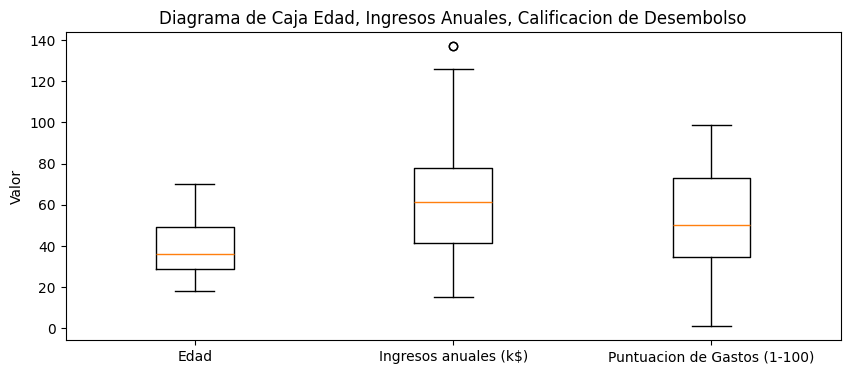

In [259]:
#Reconocimiento de datos Ausentes o No Existentes y los Atipicos
mtplot.figure(figsize=(10, 4))
#se esta encargando unos datos para crear una grafica
mtplot.boxplot([variable1['Age'], variable1['Annual Income (k$)'], variable1['Spending Score (1-100)']], 
               labels=['Edad', 'Ingresos anuales (k$)', 'Puntuacion de Gastos (1-100)'])
mtplot.ylabel('Valor')
mtplot.title('Diagrama de Caja Edad, Ingresos Anuales, Calificacion de Desembolso')
mtplot.show()

#Diagrama de caja para identificar valores atipicos en las variables conprendidas entre 0 y 16

Solo se va a presentar valores atipico en los ingresos anuales, para lo que se elaboro el diagrama de cajas unicamente para los ingresos anuales.

2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario

In [260]:
#Vamos a indentificar los valores usentes en el Dataframe

print(variable1.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [261]:
#Vamos a comprobar la presencia de los registros dublicados 

print(f' La cantidad de Registros Dublicados Es: ', variable1.duplicated().sum())

 La cantidad de Registros Dublicados Es:  0


#Como no existe un dato duplicado, no es necesario realizar limpienza en los datos.

3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características.

Para este modelo se debe utilizar las caracteristicas de: Age(Edad), Annual Income (k$) (Ingresos Anuales), Spending Score (1-100) (Puntuacion de Gastos)

In [262]:
#Se realiza la eliminacion y se frilta las columnas que se van a trabajar 

varaible_filtrado = variable1.drop(['Gender', 'CustomerID'], axis = 1)

In [263]:
#Se realizara la verificacion de las variablas antes de trabajar el modelo 

varaible_filtrado.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [264]:
#Realizamos la indentificacion de la realacion que tiene las variables 

print(varaible_filtrado.corr())

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


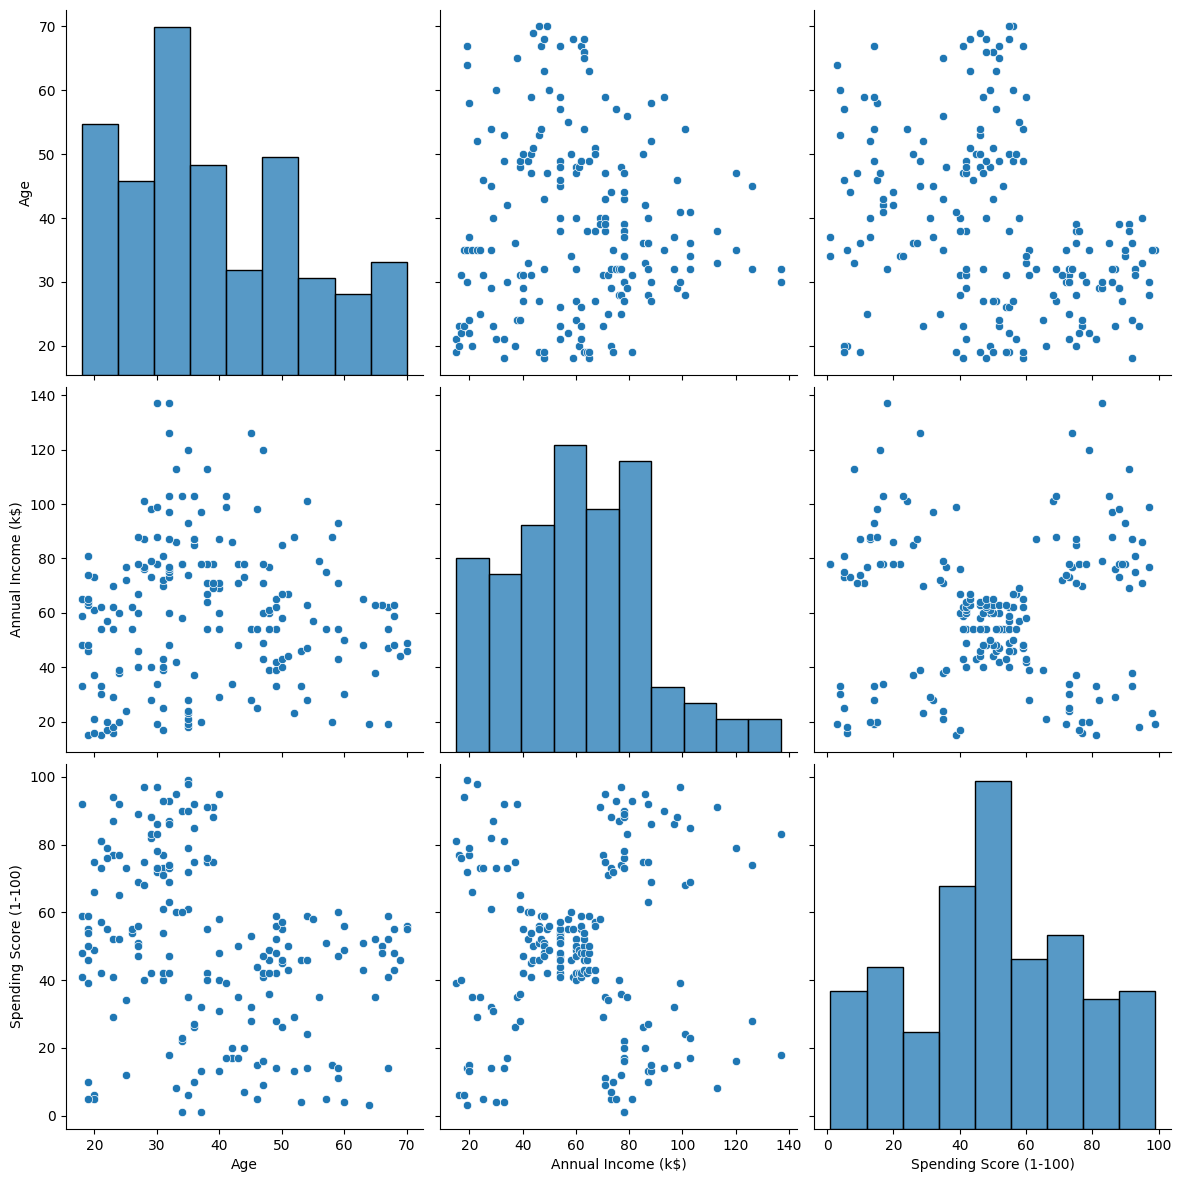

In [265]:
#Vamos a realizar la grafica correspondiente a las realiaciones anteriro mente realizadas

born.pairplot(varaible_filtrado, size=4, kind='scatter')

4. Entrenar el modelo configurando los diferentes 
hiperparámetros.


In [266]:
#Antes de entrenar el modelo Hidearchical clustering, es necesario tener estarandizado los datos que necesitamos 

ring = StandardScaler()
x = pds.DataFrame(ring.fit_transform(varaible_filtrado), columns = varaible_filtrado.columns)
x

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


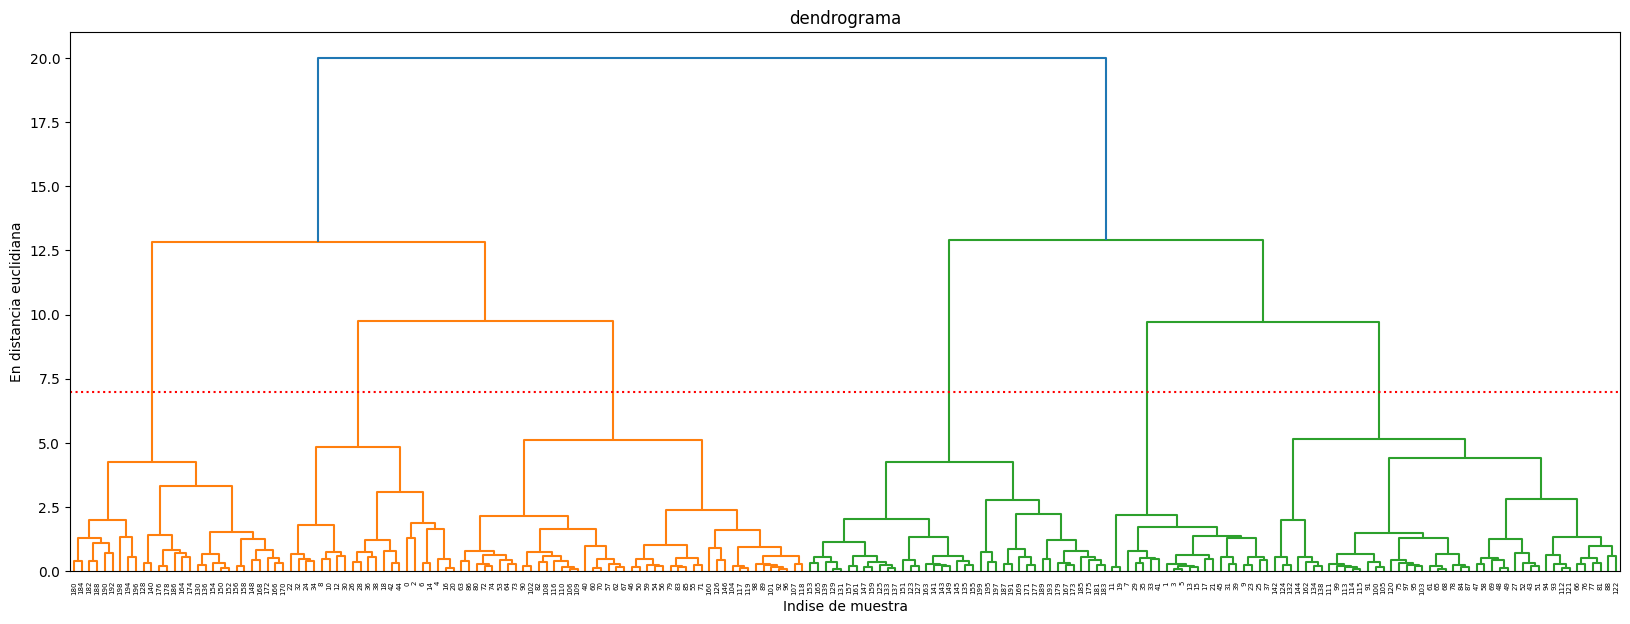

In [267]:
#Se realiza el proceso de establecer la cantidad de grupo a emplear a traes de dendograma

dendo = linkage(x, method = "ward", metric = "euclidean")
mtplot.figure(figsize = (20,7))
dendrogram(dendo)
mtplot.axhline(y = 7, color = 'r', linestyle = ':')
mtplot.title('dendrograma')
mtplot.xlabel('Indise de muestra')
mtplot.ylabel('En distancia euclidiana')
mtplot.show()

  Al examinar el endogram es posible notar los incrementos mas notables en la altura de las uniones entre 5 a 10 unidades, poir lo que se dibujo la linea horizontal a la altura de 7 unidades, observando que esta inserta 6 lineas verticales lo que se indica y se muestra que es el numero ideal para entrenar el modelo 

In [268]:
#Se establece el modelo de agrupacion con 6 grupos, se modifica y se llevara a acabo la creacion de las etiquitas 

clearpaster = AgglomerativeClustering(n_clusters = 5)
label_hier = clearpaster.fit_predict(x)
label_hier 


array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

Text(0, 0.5, 'media, indices = Silhoutte')

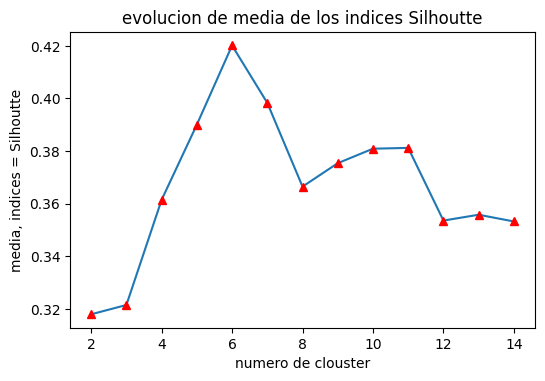

In [269]:
#Se va a crear el metodo SILHOUETTE, este metodo sirve para indentifical el numero octico t clusters

#Se procede a crear variables

Modeloclauster_= None
silueta = 0

#Esta variable se utiliza para tener el intervalo para los numero clouster
rango_clouster = range(2,15)

#Se utiliza para guardar la lista de los resultados optenidos
resultado = []

#Vamos a indicarle si analiza el ciclo de modelo con diferentes valores de clauster
for n_clusters in rango_clouster:
    modelo = AgglomerativeClustering(
                metric = 'euclidean',
                linkage = 'ward',
                n_clusters = n_clusters
            )
    
    cluster_label = modelo.fit_predict(x)  

    #Ahora vamos a determinar la metricas de calidad para el modelo
    puntaje_silueta = metrics.silhouette_score(x,cluster_label)
    indice_calinski_aharanbasz = metrics.calinski_harabasz_score(x,cluster_label)
    indice_device = metrics.davies_bouldin_score(x,cluster_label)
    resultado.append(
        {'Clauster': n_clusters, 
        'Silhouette': puntaje_silueta,
        'Calinski': indice_calinski_aharanbasz,
        'Device_bouldin': indice_device}
         )
    #Vamos a crear una condicional para concervar el modelo mas destacado
    if puntaje_silueta > silueta:
        silueta = puntaje_silueta
        Modeloclauster_ = modelo

#Ahora vamos a elaborar un DataFrame que obtengamos los resultados optenidos

resultado_df = pds.DataFrame(resultado)
fig,ax = mtplot.subplots(1,1, figsize = (6,3.84))
ax.plot(rango_clouster,resultado_df['Silhouette'], marker = '^', markerfacecolor = 'red', markeredgecolor = 'red')
ax.set_title('evolucion de media de los indices Silhoutte')
ax.set_xlabel('numero de clouster')
ax.set_ylabel('media, indices = Silhoutte')


Segun los hayasgos, los modelos mas adecuado consta de 6 clusters, detectado en el dendograma mediante los indices de Silhoutte

In [270]:
#Se establece el modelo de realision clusters 6, se modifica y se lleva a acabo la prediccion de las etiquitas

#Se realiza la seleccion mas adecuado del ciclo de evaluacion, llevado a acabo en el ciclo predio o en el antior 

labels_hier = Modeloclauster_.fit_predict(x)
labels_hier

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

Evaluar el modelo para aplicar el KMeeans

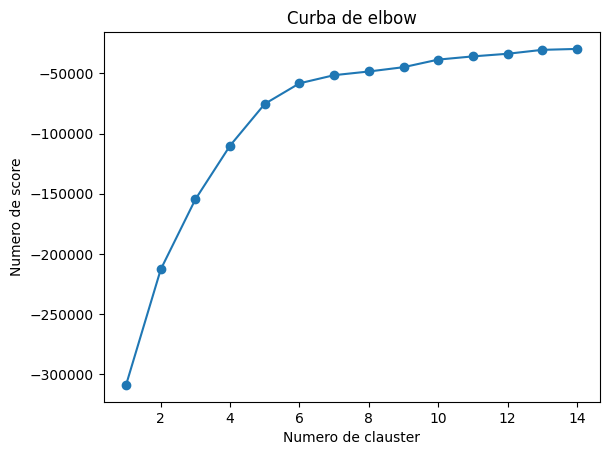

In [271]:
#Vamos a establecer la cantidad de de Cluster a emplear a travez del grafico codo
numbercluster = range (1,15)
kmeeans = [KMeans(n_clusters = i)for i in numbercluster]
kmeeans 
core = [kmeeans[i].fit(varaible_filtrado).score(varaible_filtrado)for i in range(len(kmeeans))]
core 
mtplot.plot(numbercluster, core, marker = 'o')
mtplot.title('Curba de elbow')
mtplot.xlabel('Numero de clauster')
mtplot.ylabel('Numero de score')
mtplot.show()


In [272]:

#Se reconoce la curva con la variación ideal hasta el número 5 al 8 de clusters.
#Por lo tanto, se capacita el modelo con estos números de agrupación para determinar cuál es el más adecuado.

# Lista de datos para los grupos n_clusters
n_clusters_list = [5, 6, 7, 8]

# Lista para guardar los resultados obtenidos
resultados = []

# Se inicializan variables
mejorModeloK = None
mejorSilueta = 0

# Ciclo para analizar el modelo con diversos valores de clúster
for i in n_clusters_list:
    modeloK = KMeans(n_clusters=i, random_state=0)
    modeloK.fit(varaible_filtrado)
    varaible_filtrado["Categoria"] = modeloK.labels_
    
    Observaciones = len(varaible_filtrado)
    X = varaible_filtrado.drop('Categoria', axis=1)
    clusters = varaible_filtrado['Categoria']
    
    # Calcular medidas de calidad para K-Means
    puntaje_silueta = metrics.silhouette_score(X, clusters)
    indice_calinski_harabasz = metrics.calinski_harabasz_score(X, clusters)
    indice_davies_bouldin = metrics.davies_bouldin_score(X, clusters)

    # Condicional para elegir mejor número de clusters
    if puntaje_silueta > mejorSilueta:
        mejorModeloK = modeloK
        mejorSilueta = puntaje_silueta
    
    # Guardar los resultados en la lista
    resultados.append({
        'Clusters': i,
        'Silhouette': puntaje_silueta,
        'Calinski-Harabasz': indice_calinski_harabasz,
        'Davies-Bouldin': indice_davies_bouldin
    })

# Elaborar un DataFrame que contenga los resultados obtenidos
resultados_df = pds.DataFrame(resultados)

# Mostrar la tabla de resultados
print(resultados_df)

   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         5    0.377111         133.490300        0.984547
1         6    0.450951         166.585711        0.751533
2         7    0.437513         160.602722        0.830779
3         8    0.426275         163.591968        0.863855


El modelo mas adecuado es el que cuenta con 6 clouster 

In [273]:
mejorModeloK.labels_
varaible_filtrado['Categoria'] = mejorModeloK.labels_
print(varaible_filtrado)

     Age  Annual Income (k$)  Spending Score (1-100)  Categoria
0     19                  15                      39          5
1     21                  15                      81          2
2     20                  16                       6          5
3     23                  16                      77          2
4     31                  17                      40          5
..   ...                 ...                     ...        ...
195   35                 120                      79          1
196   45                 126                      28          3
197   32                 126                      74          1
198   32                 137                      18          3
199   30                 137                      83          1

[200 rows x 4 columns]


5. Evaluar el desempeño del modelo con métricas como 
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

Para poder evaluar el modelo se le asigno la metrica para el modelo mas optimo (6 clusters), podemos emplear los resultados del ciclo que se llevo a acabo para establecer el numero de clusters, dado que en este lugar que se genero una lista que adverga los resultados de cada uno

In [274]:
#Realizamos el calculo de medidas de calidad para clustering gerarquico

print('Medidadas de calidad para clustering gerarquico:')
print('Numeor de observaciones: ', len(variable1))
print('Puntaje de silueta: ',metrics.silhouette_score(x,cluster_label))
print('Indice de Calinskin_harabasz: ', metrics.calinski_harabasz_score(x,cluster_label)) 
print('Davies bouldin: ',metrics.davies_bouldin_score(x,cluster_label))

Medidadas de calidad para clustering gerarquico:
Numeor de observaciones:  200
Puntaje de silueta:  0.35322985543969
Indice de Calinskin_harabasz:  121.43664302807248
Davies bouldin:  0.9492638068830613


Como podemos ver, es el contraste del modelo con distintos numero de clustering

In [275]:
print(resultado_df)

    Clauster  Silhouette    Calinski  Device_bouldin
0          2    0.317957   99.000668        1.308296
1          3    0.321489   88.101741        1.127729
2          4    0.361451  102.019399        1.016382
3          5    0.390028  107.826560        0.916289
4          6    0.420117  127.986454        0.852102
5          7    0.398295  120.686805        0.851329
6          8    0.366479  118.066796        0.841587
7          9    0.375385  117.475123        0.858235
8         10    0.380889  117.221895        0.885471
9         11    0.381198  118.548799        0.921740
10        12    0.353572  122.381270        0.979342
11        13    0.355790  121.943615        0.948789
12        14    0.353230  121.436643        0.949264


In [276]:
#Se realiza el calculo del coeficiente de correlacion 
x_dist = pdist(x) #Computacion de distancia 
z = linkage(x, 'ward') #Computacion de linkage matriz
#Vamos a calcular el coeficiente de correlacion
kode_cofenetico = cophenet(z,x_dist)
print('El coeficiente de correlacion: ', kode_cofenetico)

El coeficiente de correlacion:  (np.float64(0.6261774947075186), array([20.00004498,  1.28368768, 20.00004498, ..., 20.00004498,
        0.74145991, 20.00004498]))


Es evidente que hay correlacion moderada entre las distancias iniciales y las reflejadas entre el dendograma, lo que se podria establecer que el dendograma, es aceptable al respecto a la representacion presentada, ya que el valor idial es 1, y se alcanzo al rededor de 0,63

Ahora procedemos a realizar la grafica de los modelo

Graficar cada uno de las posibles relaciones para verificar su agrupamiento 

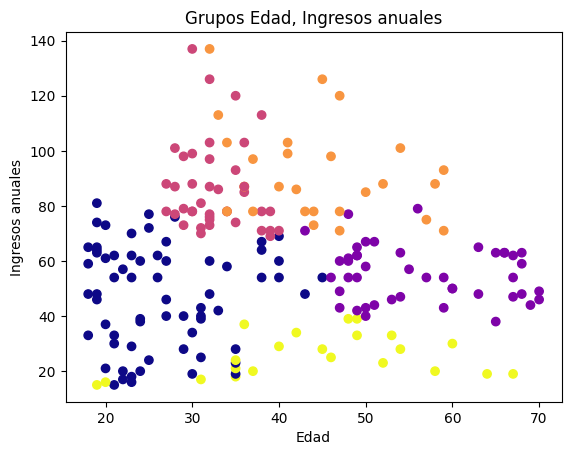

In [277]:
# Se creara el Scatter plot, para los puntos

scatter = mtplot.scatter(varaible_filtrado['Age'], varaible_filtrado['Annual Income (k$)'], c = label_hier, cmap = 'plasma')
mtplot.title('Grupos Edad, Ingresos anuales')
mtplot.xlabel('Edad')
mtplot.ylabel('Ingresos anuales')
mtplot.show()

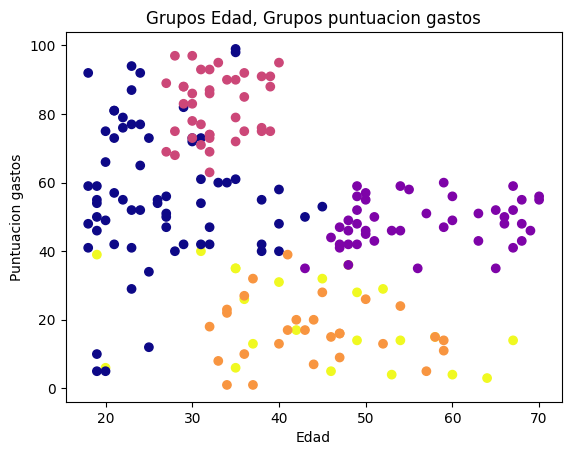

In [278]:
#Se elabora el argumento de dispercion para los puntos

mtplot.scatter(varaible_filtrado['Age'], varaible_filtrado['Spending Score (1-100)'], c = label_hier, cmap = 'plasma')
mtplot.title('Grupos Edad, Grupos puntuacion gastos')
mtplot.xlabel('Edad')
mtplot.ylabel('Puntuacion gastos')
mtplot.show()

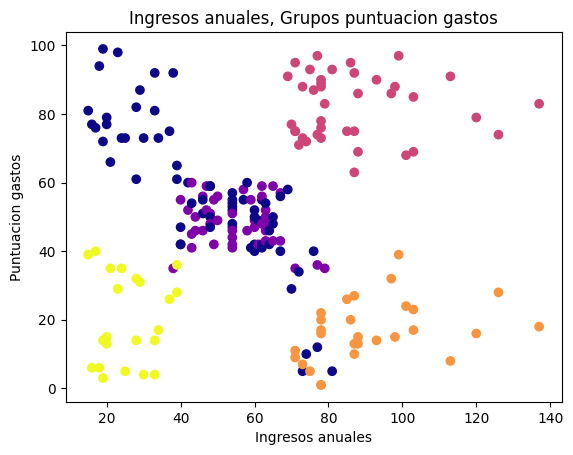

In [279]:

mtplot.scatter(varaible_filtrado['Annual Income (k$)'], varaible_filtrado['Spending Score (1-100)'], c = label_hier, cmap = 'plasma')
mtplot.title('Ingresos anuales, Grupos puntuacion gastos')
mtplot.xlabel('Ingresos anuales')
mtplot.ylabel('Puntuacion gastos')
mtplot.show()

In [280]:
# Se realiza un modelo 3D de los datos agrupados

Grafica_3D = pxss.scatter_3d(varaible_filtrado, 
                             x='Age', y='Annual Income (k$)', 
                             z='Spending Score (1-100)', 
                             color=labels_hier, 
                             symbol=labels_hier, 
                             symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle', 6: 'circle'}, 
                             opacity=0.7, width=900, height=850, title=f'Modelo de Hierarchical con un k={6}', 
                             labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False)

In [281]:
Observaciones = len(varaible_filtrado)
x = varaible_filtrado.drop('Categoria', axis = 1)
clusters = varaible_filtrado ['Categoria']

#Vamos a calcular las medidas de caldiad para kmeans
print('Medidas de calidad para k-means: ')
print('Numero de observaciones: ', len(variable1))
print('Puntaje de silueta: ',metrics.silhouette_score(x,clusters))
print('Indice de Calinskin_harabasz: ', metrics.calinski_harabasz_score(x,clusters)) 
print('Davies bouldin: ',metrics.davies_bouldin_score(x,clusters))

Medidas de calidad para k-means: 
Numero de observaciones:  200
Puntaje de silueta:  0.45095124469943243
Indice de Calinskin_harabasz:  166.5857109469557
Davies bouldin:  0.7515325100425702


In [282]:
#Vamos a obtener las cordenadas de centroides 
C = mejorModeloK.cluster_centers_
print(C)

[[56.34090909 53.70454545 49.38636364  1.36363636]
 [32.69230769 86.53846154 82.12820513  1.        ]
 [25.52173913 26.30434783 78.56521739  2.        ]
 [41.64705882 88.73529412 16.76470588  3.        ]
 [27.31578947 57.5        48.44736842  4.        ]
 [44.31818182 25.77272727 20.27272727  0.09090909]]


6. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo


In [283]:
#Vamos a colocar las funciones de los colores de los centroides 

def colorCentroides (variable1, centers,scatter):
    #Vamos a obtener el color map
    cmap = mtplot.cm.get_cmap('viridis')
    #Vamos a obtener los colores unicos de la categoria
    cu = varaible_filtrado['Categoria'].unique()
    colores = [cmap(i/len(cu)) for i in range(len(cu))]
    #Vamos a crear el Scatter plot para los centro usando los colores del colormap
    for i, centro in enumerate(C):
        mtplot.scatter(centro[0], centro[1],marker = '+', color = colores[i], s = 100)

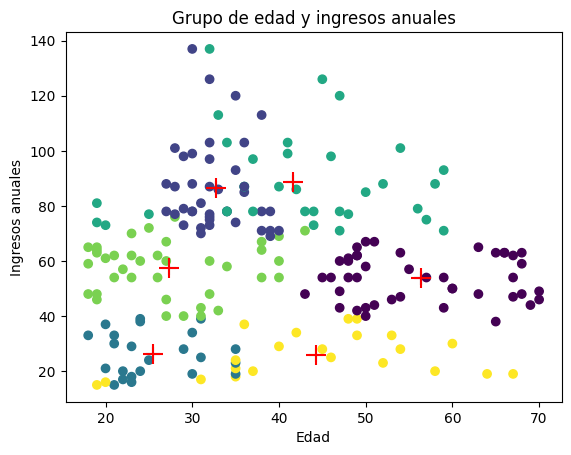

In [284]:
#Elaborar el scatter plot para los puntos 
scatter = mtplot.scatter(varaible_filtrado['Age'], 
                         varaible_filtrado['Annual Income (k$)'], 
                         c = varaible_filtrado['Categoria'], 
                         cmap = 'viridis')
# Vamos a llamar la funcion para asignar los colores a los viridis
colorCentroides(varaible_filtrado,C,scatter)
mtplot.scatter(C[:,0],C[:,1],marker='+',color = 'red', s=200)
mtplot.title('Grupo de edad y ingresos anuales')
mtplot.xlabel('Edad')
mtplot.ylabel('Ingresos anuales')
mtplot.show()

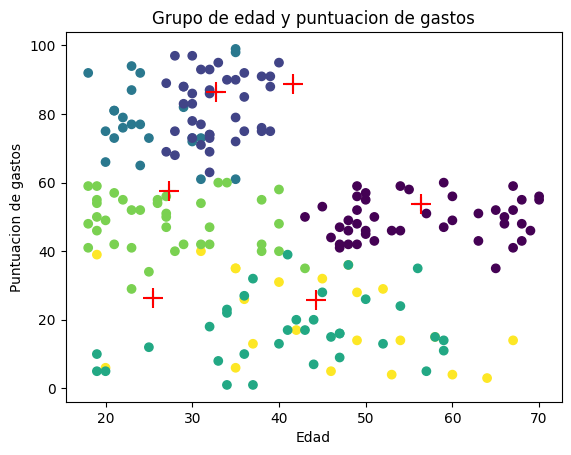

In [285]:
#Elaborar el scatter plot para los puntos 
scatter = mtplot.scatter(varaible_filtrado['Age'], 
                         varaible_filtrado['Spending Score (1-100)'], 
                         c = varaible_filtrado['Categoria'], 
                         cmap = 'viridis')
# Vamos a llamar la funcion para asignar los colores a los viridis
colorCentroides(varaible_filtrado,C,scatter)
mtplot.scatter(C[:,0],C[:,1],marker='+',color = 'red', s=200)
mtplot.title('Grupo de edad y puntuacion de gastos')
mtplot.xlabel('Edad')
mtplot.ylabel('Puntuacion de gastos')
mtplot.show()

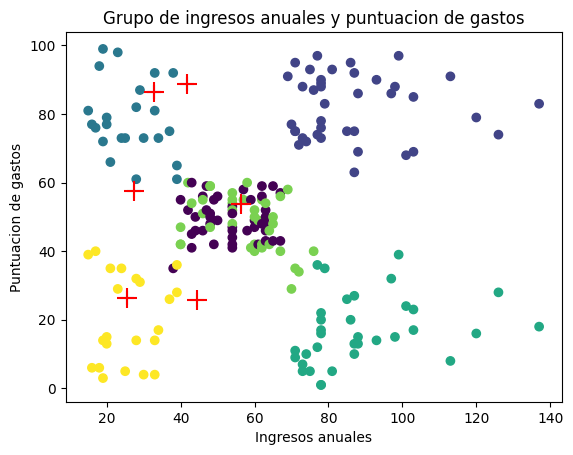

In [286]:
#Elaborar el scatter plot para los puntos 
scatter = mtplot.scatter(varaible_filtrado['Annual Income (k$)'], 
                         varaible_filtrado['Spending Score (1-100)'], 
                         c = varaible_filtrado['Categoria'], 
                         cmap = 'viridis')
# Vamos a llamar la funcion para asignar los colores a los viridis
colorCentroides(varaible_filtrado,C,scatter)
mtplot.scatter(C[:,0],C[:,1],marker='+',color = 'red', s=200)
mtplot.title('Grupo de ingresos anuales y puntuacion de gastos')
mtplot.xlabel('Ingresos anuales')
mtplot.ylabel('Puntuacion de gastos')
mtplot.show()